# Forecasting Software Developer Employment in Santa Clara County: Demand, Housing Constraints, and Predictive Reliability

## Abstract

This research scrutinizes the employment trends of software developers in the San Jose-Sunnyvale-Santa Clara metropolitan statistical area (MSA), the core of Silicon Valley. In light of rapid advances in artificial intelligence (AI) and automation, we evaluate whether local economic indicators—job demand, housing costs, and unemployment—serve as reliable predictors of employment. We have data from 2014 to 2024 and use multiple linear regression and ARIMAX models to predict employment levels till 2027 along with exploratory analyses such as correlation matrices, scatterplots, and seasonal decomposition. 

The findings indicate that housing costs significantly limit the labor supply while job demand continues to be a strong positive driver of employment. The regression modeling had high explanatory power (R² = 0.827), however, multicollinearity and a small sample size limit the ability to interpret the results. ARIMAX forecasts were more cautious but had narrower confidence intervals, thus indicating more stability. Both models anticipate that software developer employment will keep growing until 2027, but the wide confidence intervals show that there is a significant amount of uncertainty. 

Besides, the results emphasize the usefulness of localized multivariate models in understanding labor market dynamics, but conclusions must be framed cautiously. The limited dataset, potential overlap of predictors, and assumptions of time stability are factors that limit the reliability of the predictions. Further studies need to broaden the data pool and use scenario-based modeling to be able to depict the impacts of AI adoption and housing affordability on employment more accurately. 

## Authors

>Tristan Endo

## Research Question

How well do job demand and housing costs predict software developer employment in Santa Clara County, controlling for unemployment, and how reliable are these predictions through 2027?

## Background and Prior Work

Over the past decade, computer science has rapidly expanded as a career pathway, with more than 60 percent of recent graduates in the field securing employment as software engineers. At the same time, rapid advances in artificial intelligence (AI) have raised concerns about the implications for technology jobs.

Recent evidence from the Stanford Digital Economy Lab indicates a sharp decline in entry‑level positions, with a 67 percent reduction between 2023 and 2024. The same study also reports a 13 percent drop in employment among workers aged 22–25 following the introduction of generative AI tools.<a name="cite_ref-1"></a><sup>1</sup> The researchers suggest that these impacts may evolve as firms adapt and integrate AI technologies more broadly into their operations.

Other studies have documented the broader labor market effects of automation. For example, Acemoglu and Restrepo (2021) show that routine task automation has contributed significantly to rising wage inequality in the United States, accounting for 50–70 percent of the increase between 1980 and 2016.<a name="cite_ref-2"></a><sup>2</sup> While technological change can displace certain categories of work, it also creates new opportunities, meaning employment outcomes depend heavily on local conditions and complementary factors.

This study focuses on the San Jose–Sunnyvale–Santa Clara metropolitan statistical area (MSA), which, according to the Bureau of Labor Statistics, has the highest concentration of software developer jobs in the United States.<a name="cite_ref-3"></a><sup>3</sup> Silicon Valley presents a distinctive case, combining abundant venture capital with high housing costs that constrain labor supply. This makes the region an ideal setting to examine how job demand and housing costs interact to shape employment outcomes.

Although there is extensive research on automation and job displacement, relatively little attention has been paid to how technology worker demand and cost of living jointly predict employment. This project develops a multivariate statistical model incorporating job demand, housing costs, and unemployment to forecast software developer employment through 2027. The analysis also acknowledges limitations such as the small sample size and methodological constraints to ensure that results are interpreted cautiously and appropriately.

References:

1. <a name="cite_note-1"></a> ^ Brynjolfsson, Erik, Chandar, Bharat, Chen, Ruyu. Canaries in the Coal Mine? Six Facts about the Recent Employment Effects of Artificial Intelligence. Aug. 2025, https://digitaleconomy.stanford.edu/wp-content/uploads/2025/08/Canaries_BrynjolfssonChandarChen.pdf

2. <a name="cite_note-2"></a> ^ Acemoglu, Daron, and Pascual Restrepo. Tasks, Automation, and the Rise in US Wage Inequality. NBER Working Paper 28920, June 2021. https://economics.mit.edu/sites/default/files/2022-10/Tasks%20Automation%20and%20the%20Rise%20in%20US%20Wage%20Inequality.pdf

3. <a name="cite_note-3"></a> ^ Bureau of Labor Statistics. “Occupational Employment and Wage Statistics (OEWS) Tables.” Bureau of Labor Statistics, 2025, https://www.bls.gov/oes/tables.htm.

## Hypothesis


We hypothesize that job demand will be positively associated with software developer employment, while housing costs will be negatively associated, even after controlling for unemployment. These relationships should provide predictive power for forecasting employment levels through 2027.

## Dataset(s)

Dataset Name: Software Developer Employment

>Link to the dataset: https://www.bls.gov/oes/tables.htm
>
>Link to the spreadsheet: [BLS Datasets - Software Developer Employment.csv](BLS%20Datasets%20-%20Software%20Developer%20Employment.csv)
>
>Number of observations: 11
>
>shape: (11,11)
>
>From 2014 to 2024, the dataset monitors yearly employment and wage data for software developers in a particular metropolitan area. It includes 11 annual observations and 11 distinct metrics, such as location quotient, annual mean wage, and employment count.

Dataset Name: Information Sector Job Openings

>Link to the dataset: https://download.bls.gov/pub/time.series/jt/jt.data.2.JobOpenings
>
>Link to the spreadsheet: [BLS Datasets - Information Sector Job Openings (Thousands).csv](BLS%20Datasets%20-%20Information%20Sector%20Job%20Openings%20(Thousands).csv)
>
>Number of observations: 132
>
>shape: (132,11)
>
>This dataset, which monitors the monthly demand for tech talent from 2014 to 2024, shows a sharp increase that peaked at 205,000 positions in early 2022 before experiencing a notable decline. The current level of 144,000 openings is higher than the pre-pandemic average despite the recent slowdown, indicating the sector's sustained long-term growth.

Dataset Name: Santa Clara County Unemployment Rate

>Link to the dataset: https://data.bls.gov/pdq/SurveyOutputServlet
>
>Link to the spreadsheet: [BLS Datasets - Unemployment Rate.csv](BLS%20Datasets%20-%20Unemployment%20Rate.csv)
>
>Number of observations: 132
>
>shape: (132,11)
>
>From a pre-pandemic low of 3.5% to a pandemic peak of 14.8% in April 2020, this monthly time series illustrates the extreme volatility of the local labor market from 2014 to 2024. Although it is still somewhat looser than the extremely competitive lows of 2022, the current rate indicates that the job market has substantially stabilized.

Dataset Name: Santa Clara County House Price Index

>Link to the dataset: https://www.fhfa.gov/hpi/download/quarterly_datasets/hpi_exp_metro.xlsx
>
>Link to the spreadsheet: [BLS Datasets - Santa Clara County House Price Index.csv](BLS%20Datasets%20-%20Santa%20Clara%20County%20House%20Price%20Index.csv)
>
>Number of observations: 44
>
>shape: (44,11)
>
>The HPI shows impressive growth, increasing by more than 124% between 2014 and 2024. It peaked in the second quarter of 2022 at a value of 572.06, which is directly correlated with the peak of the growth in tech jobs. After a brief correction in late 2022, the index has recovered and is currently at 611.37, demonstrating the region's strong and enduring housing demand.

## Setup

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Setup code --

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

### Santa Clara County Software Developer Employment (SDE)
>Only care about employment numbers. So cleaning to get only the numbers under Employment category

In [ ]:
sde_df = pd.read_csv("BLS Datasets - Software Developer Employment.csv")

sde_df.head(15)

,Year,Occupation Title,Level,Employment,Employment RSE (Percent),Employment per 1000 jobs,Location Quotient,Median Hourly Wage,Mean Hourly Wage,Annual Mean Wage,Mean Wage RSE (Percent)
0,2014,Software Developer,detail,"33,990",10.1,34.917,6.87,66.21,68.45,"142,370.00",4.6
1,2015,Software Developer,detail,"42,650",17.7,42.156,7.77,67.90,70.78,"147,220.00",4.5
2,2016,Software Developer,detail,"41,490",9.0,39.689,7.02,62.28,63.95,"133,010.00",2.5
3,2017,Software Developer,detail,"48,750",5.0,44.767,7.51,61.16,63.55,"132,170.00",1.6
4,2018,Software Developer,detail,"50,440",4.8,45.070,7.22,61.25,63.33,"131,720.00",1.6
5,2019,Software Developers,detail,"81,950",4.4,71.833,7.50,68.05,70.06,"145,730.00",1.2
6,2020,Software Developers,detail,"77,900",9.8,70.625,6.65,75.30,75.71,"157,480.00",1.6
7,2021,Software Developers,detail,"67,780",2.4,63.427,6.55,79.34,80.49,"167,420.00",0.8
8,2022,Software Developers,detail,"83,860",1.9,74.674,7.20,92.86,112.76,"234,540.00",1.6
9,2023,Software Developers,detail,"96,590",1.5,84.597,7.75,95.72,96.06,"199,800.00",0.3


In [ ]:
sde_df["Employment"] = sde_df["Employment"].replace({",":""}, regex=True).astype(int)

sde_df["Employment"].head(20)

0     33990
1     42650
2     41490
3     48750
4     50440
5     81950
6     77900
7     67780
8     83860
9     96590
10    90280
Name: Employment, dtype: int64

### Santa Clara County Information Sector Job Openings (ISJO) (Thousands)

In [ ]:
isjo_df = pd.read_csv("BLS Datasets - Information Sector Job Openings (Thousands).csv")

isjo_df.head(20)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2014,111,107,105,114,113,101,112,111,103,86,126,107
1,2015,111,130,110,109,109,113,125,116,116,112,70,111
2,2016,111,94,89,84,114,90,80,79,102,85,82,81
3,2017,88,70,86,102,110,112,98,120,106,91,97,125
4,2018,128,129,130,177,128,133,148,146,121,143,135,130
5,2019,143,138,152,114,129,130,151,128,178,148,143,141
6,2020,130,138,121,118,93,106,79,86,110,126,109,123
7,2021,169,111,107,127,152,174,202,220,201,205,216,245
8,2022,233,259,262,273,247,254,238,200,218,211,221,81
9,2023,100,154,145,148,157,156,156,148,99,100,147,143


This is measured in thousands. For example, January 2014 saw 111,000 job openings.

### Santa Clara County Unemployment Rate (UR) (%)

In [ ]:
ur_df = pd.read_csv("BLS Datasets - Unemployment Rate.csv")

ur_df.head(20)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
1,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
2,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
3,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1
4,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9
5,2019,4.0,3.8,3.8,3.7,3.6,3.6,3.7,3.6,3.5,3.6,3.6,3.6
6,2020,3.6,3.5,4.4,14.8,13.2,11.0,10.2,8.4,7.8,6.9,6.7,6.7
7,2021,6.4,6.2,6.1,6.1,5.8,5.9,5.4,5.1,4.7,4.5,4.2,3.9
8,2022,4.0,3.8,3.7,3.7,3.6,3.6,3.5,3.6,3.5,3.6,3.6,3.5
9,2023,3.5,3.6,3.5,3.4,3.6,3.6,3.5,3.7,3.8,3.9,3.7,3.8


### Santa Clara County House Price Index (HPI)

In [ ]:
hpi_df  = pd.read_csv("BLS Datasets - Santa Clara County House Price Index.csv")

hpi_df.head(20)

,Year,Q1_nsa,Q2_nsa,Q3_nsa,Q4_nsa,Q1_sa,Q2_sa,Q3_sa,Q4_sa
0,2014,271.03,284.69,288.95,290.08,272.54,279.51,285.10,290.47
1,2015,297.47,310.41,318.97,319.81,298.59,304.53,315.30,320.59
2,2016,323.34,335.44,333.75,335.32,323.73,328.98,330.53,336.33
3,2017,344.97,355.48,361.55,374.81,344.84,348.24,358.83,376.04
4,2018,380.92,396.35,393.59,388.55,380.39,387.84,391.45,389.34
5,2019,394.69,402.59,392.82,392.33,394.63,393.21,391.31,392.59
6,2020,396.51,394.70,408.46,405.95,397.23,384.89,407.22,405.58
7,2021,416.22,450.19,457.18,478.63,418.10,438.32,455.80,477.71
8,2022,478.92,510.50,501.65,505.54,482.20,496.62,499.79,504.33
9,2023,502.56,519.56,519.87,506.08,506.86,505.40,517.10,505.19


NSA = "not seasonally adjusted"       
>Raw data values as observed, without any statistical adjustment
>
>Reflects actual quarterly fluctuations, including seasonal effects (e.g., hiring surges in Q4, summer slowdowns).
>
>These are very useful to see the “real” ups and downs but it is quite difficult to interpret long‑term trends because seasonal cycles dominate. 

SA = "seasonally adjusted"
>Data which has been statistically modified to take out the seasonal patterns that can be predicted. 
>
>It becomes a lot easier to compare different quarters and years as the recurring seasonal effects are removed. 
>
>Most of the time it is being used in forecasting and regression models as it shows the basic trends and the cycles of the‍‌ economy. 



# Exploratory Data Analysis
>Unless otherwise noted, all visualizations are plotted using normalized values (scaled 0–1) to allow direct comparison across variables measured in different units.

## Setup/Normalization Setting

### Description
>We cleaned the employment data by removing formatting commas and converting values to integers. Annual averages were then calculated for job openings, the unemployment rate, and the House Price Index to ensure consistency across time. To address skewness, log transformations were applied to Employment and HPI, improving normality and stabilizing variance. Because predictors were measured in different units (job openings in thousands, unemployment in percentages, housing index in hundreds), we standardized them using StandardScaler so regression coefficients would be directly comparable. Finally, we verified data cleanliness by checking for missing values and visualizing distributions with histograms and boxplots, ensuring the dataset was ready for regression and ARIMAX forecasting.

In [ ]:
sde_df["Employment"] = sde_df["Employment"].replace({",": ""}, regex=True).astype(int)

isjo_df["ISJO_Avg"] = isjo_df.loc[:, "Jan":"Dec"].mean(axis=1)
ur_df["UR_Avg"] = ur_df.loc[:, "Jan":"Dec"].mean(axis=1)
hpi_df["HPI_Avg"] = hpi_df.loc[:, ["Q1_sa","Q2_sa","Q3_sa","Q4_sa"]].mean(axis=1)

merged = (
    sde_df[["Year","Employment"]]
    .merge(isjo_df[["Year","ISJO_Avg"]], on="Year")
    .merge(ur_df[["Year","UR_Avg"]], on="Year")
    .merge(hpi_df[["Year","HPI_Avg"]], on="Year")
)

merged["Employment_log"] = np.log1p(merged["Employment"])
merged["HPI_log"] = np.log1p(merged["HPI_Avg"])

scaler = StandardScaler()
predictors = ["ISJO_Avg","UR_Avg","HPI_Avg"]
merged[predictors] = scaler.fit_transform(merged[predictors])

numeric_cols = merged.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    merged[col + "_norm"] = (merged[col] - merged[col].min()) / (merged[col].max() - merged[col].min())

print("\nMerged dataset with raw, log-transformed, standardized, and normalized values:")
print(merged.head())


Merged dataset with raw, log-transformed, standardized, and normalized values:
   Year  Employment  ISJO_Avg    UR_Avg   HPI_Avg  Employment_log   HPI_log  \
0  2014       33990 -0.695266  1.023730 -1.520754       10.433851  5.645111   
1  2015       42650 -0.613785  0.348959 -1.174945       10.660806  5.738997   
2  2016       41490 -1.159257  0.043403 -0.924848       10.633232  5.801794   
3  2017       48750 -0.901233 -0.351274 -0.588384       10.794481  5.880498   
4  2018       50440  0.101440 -0.707757 -0.212524       10.828560  5.961662   

   Year_norm  Employment_norm  ISJO_Avg_norm  UR_Avg_norm  HPI_Avg_norm  \
0        0.0         0.000000       0.127646     0.565299      0.000000   
1        0.1         0.138339       0.150062     0.367537      0.108421   
2        0.2         0.119808       0.000000     0.277985      0.186834   
3        0.3         0.235783       0.070984     0.162313      0.292326   
4        0.4         0.262780       0.346824     0.057836      0.41017

### Interpretation
>The merged dataset shows that all variables are complete (no null values or NaN), confirming the data is clean. After log transformation and standardization, predictors like job openings (ISJO), unemployment rate (UR), and housing prices (HPI) can now be compared directly. We transformed Employment and HPI so their distributions are more normal and consistent, making them better inputs for regression and ARIMAX forecasting.

## Exploratory Data Analysis: Basic Inspection and Distributions

### Description
>This process provides a first impression of the merged dataframe, including its shape, data types, missing values, and summary statistics. Distribution plots then show the spread of employment, job openings, unemployment rate, and housing prices across the observed years.

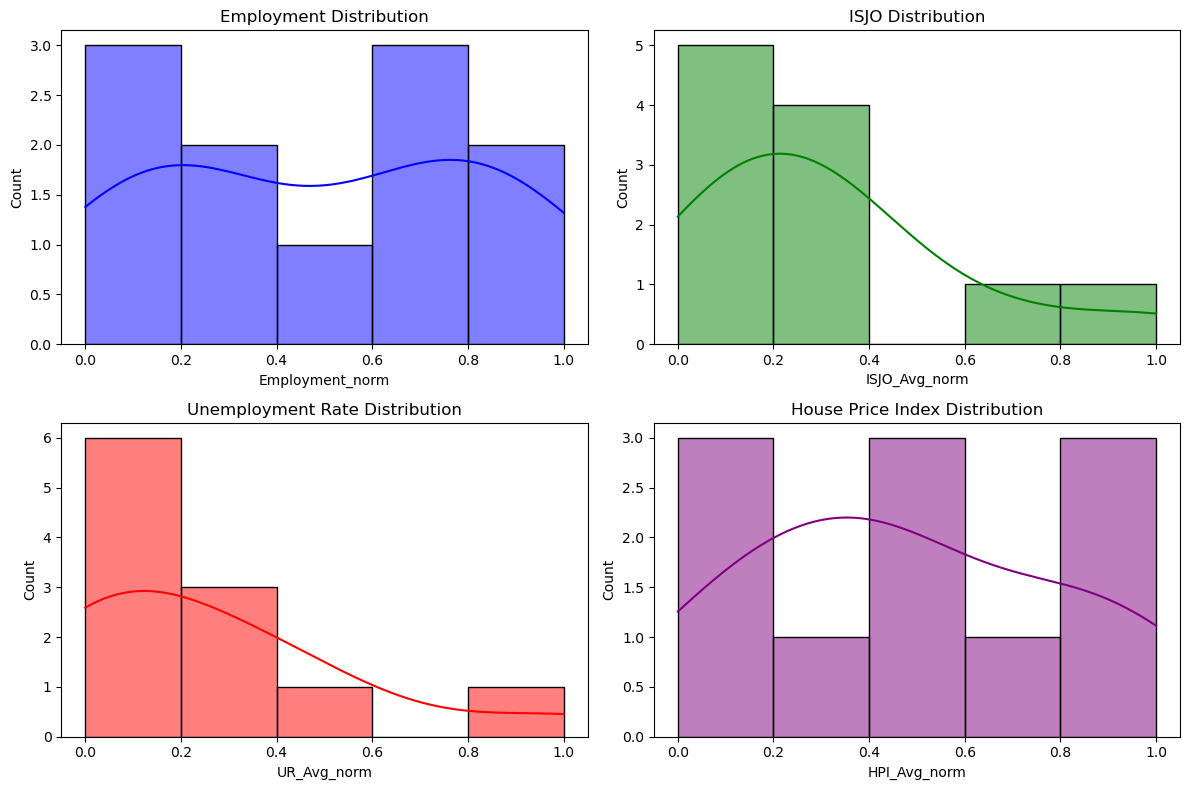

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.histplot(merged["Employment_norm"], kde=True, ax=axes[0,0], color="blue")
axes[0,0].set_title("Employment Distribution")
sns.histplot(merged["ISJO_Avg_norm"], kde=True, ax=axes[0,1], color="green")
axes[0,1].set_title("ISJO Distribution")
sns.histplot(merged["UR_Avg_norm"], kde=True, ax=axes[1,0], color="red")
axes[1,0].set_title("Unemployment Rate Distribution")
sns.histplot(merged["HPI_Avg_norm"], kde=True, ax=axes[1,1], color="purple")
axes[1,1].set_title("House Price Index Distribution")
plt.tight_layout(); plt.show()

### Interpretation
>Employment and housing prices are skewed to the right, reflecting consistent growth over time. Unemployment remains concentrated at low percentages, while job openings display a wider range of values across different years.

## Software Developer Employment Trend (1- and 3‑Year Rolling Average)

### Description
>Rolling averages smooth fluctuations in employment to highlight underlying patterns. The yearly rolling average captures short‑term changes, showing how employment shifts from one year to the next. The 3‑year rolling average emphasizes medium‑term stability, reducing volatility and clarifying broader growth trends. Together, these plots allow comparison between immediate annual changes and longer‑term trajectories.

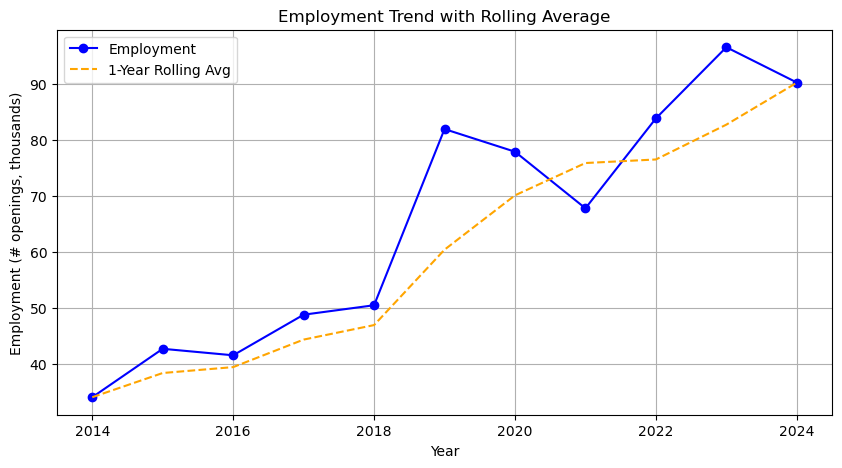

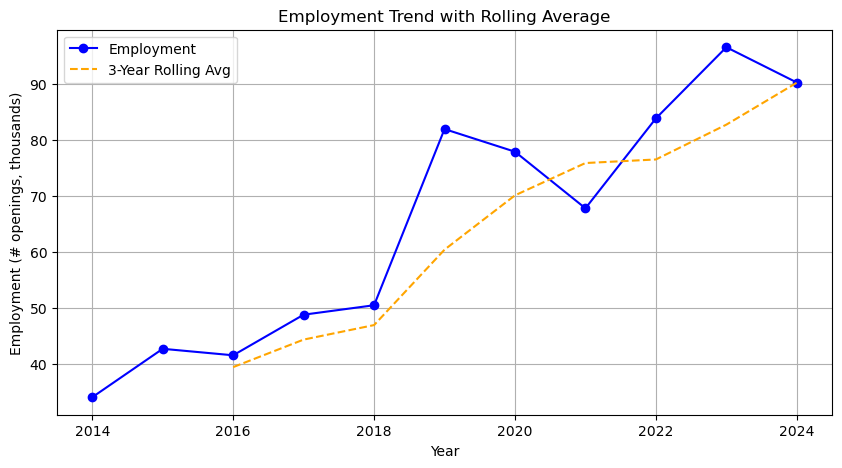

In [ ]:
# (Microsoft CoPilot was used to map the 1 and 3 year rolling average)
merged["Employment_roll"] = merged["Employment"].rolling(window=3, min_periods=1).mean()
plt.figure(figsize=(10,5))
plt.plot(merged["Year"], merged["Employment"]/1000, marker="o", label="Employment", color="blue")
plt.plot(merged["Year"], merged["Employment_roll"]/1000, linestyle="--", label="1-Year Rolling Avg", color="orange")
plt.xlabel("Year"); plt.ylabel("Employment (# openings, thousands)")
plt.title("Employment Trend with Rolling Average")
plt.legend(); plt.grid(True); plt.show()

merged["Employment_roll"] = merged["Employment"].rolling(window=3, min_periods=3).mean()
plt.figure(figsize=(10,5))
plt.plot(merged["Year"], merged["Employment"]/1000, marker="o", label="Employment", color="blue")
plt.plot(merged["Year"], merged["Employment_roll"]/1000, linestyle="--", label="3-Year Rolling Avg", color="orange")
plt.xlabel("Year"); plt.ylabel("Employment (# openings, thousands)")
plt.title("Employment Trend with Rolling Average")
plt.legend(); plt.grid(True); plt.show()

### Interpretation
>The yearly rolling average reveals sharper dips and spikes, such as the pandemic‑related decline, making short‑term volatility more visible. The 3‑year rolling average smooths these fluctuations, showing a steadier upward trajectory overall. Both plots confirm that employment has grown consistently despite temporary setbacks. The contrast highlights how short‑term shocks differ from long‑term structural growth in the labor market.

## Employment and Predictor Relationships

### Description
>Pairwise scatterplots illustrate relationships between normalized employment, job openings, unemployment, and housing prices. Diagonal density plots show the distribution of each variable.

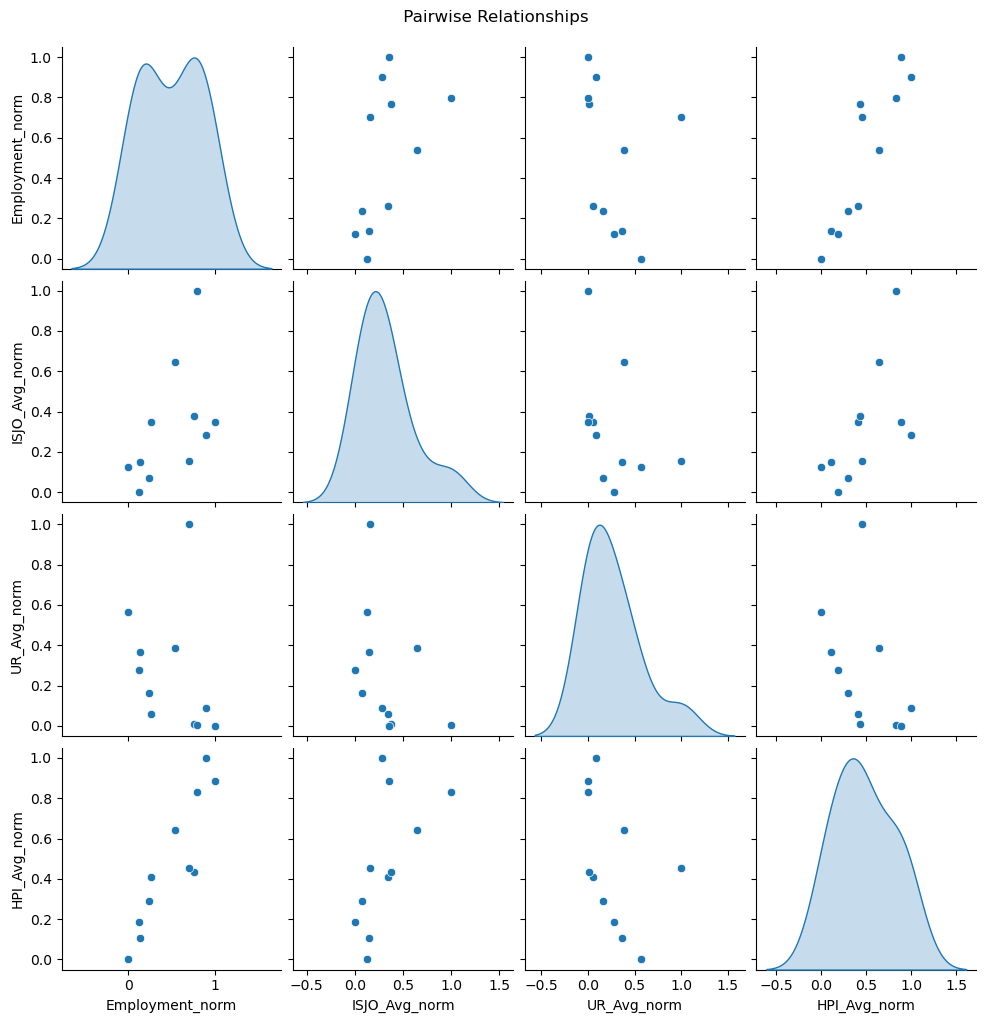

In [ ]:
sns.pairplot(merged[["Employment_norm","ISJO_Avg_norm","UR_Avg_norm","HPI_Avg_norm"]], diag_kind="kde")
plt.suptitle(" Pairwise Relationships", y=1.02)
plt.show()

### Interpretation
>The pairplot shows how employment, job openings, unemployment, and housing prices relate to each other. Employment, job openings, and housing prices all rise and fall together, showing strong positive correlations. In contrast, unemployment moves in the opposite direction, with a negative correlation to employment and job openings. The diagonal KDE plots show the distribution of each variable. Employment and housing prices are skewed toward higher values, job openings are more evenly spread out, and unemployment is concentrated at lower values. Overall, the plots suggest that some predictors overlap strongly — especially job openings and housing prices — which points to multicollinearity. They also highlight that unemployment behaves differently from the other variables, acting as a counter‑force in the labor market.

## Outlier Detection Across Employment and Predictors

### Description 
>Boxplots visualize the distribution and potential outliers for each normalized variable. They provide a quick check for anomalies in employment, job openings, unemployment, and housing prices.

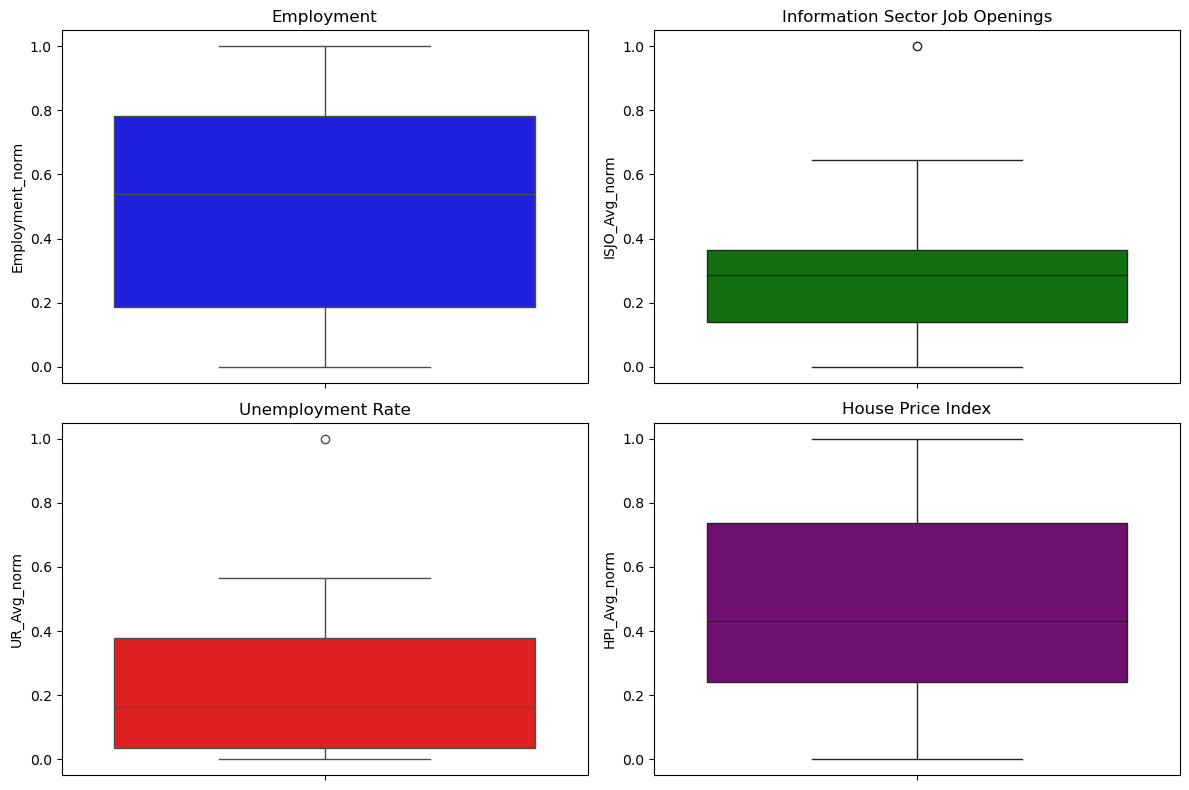

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.boxplot(y=merged["Employment_norm"], ax=axes[0,0], color="blue"); axes[0,0].set_title("Employment")
sns.boxplot(y=merged["ISJO_Avg_norm"], ax=axes[0,1], color="green"); axes[0,1].set_title("Information Sector Job Openings")
sns.boxplot(y=merged["UR_Avg_norm"], ax=axes[1,0], color="red"); axes[1,0].set_title("Unemployment Rate")
sns.boxplot(y=merged["HPI_Avg_norm"], ax=axes[1,1], color="purple"); axes[1,1].set_title("House Price Index")
plt.tight_layout(); plt.show()

### Interpretation

>Employment and housing prices trend higher in later years, but the boxplots show no extreme outliers. Unemployment and job openings fluctuate more over time, yet all values remain within expected ranges. This consistency across variables indicates that the dataset is reliable and free from unusual distortions. Overall, the boxplots confirm good data quality for analysis.

## Autocorrelation and Partial Autocorrelation of Employment

### Description
>ACF and PACF plots examine temporal dependence in raw employment data. They reveal how employment values correlate with their own past lags.

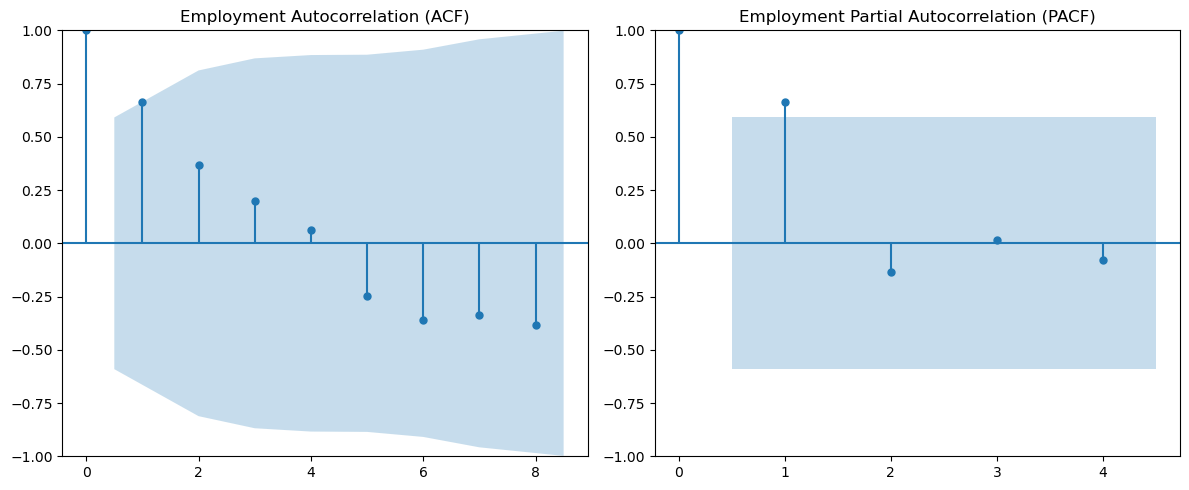

In [ ]:
# (Microsoft Copilot was used to properly use ACF and PACF from the statsmodel library)
fig, axes = plt.subplots(1, 2, figsize=(12,5))
plot_acf(merged["Employment"], lags=8, ax=axes[0])
axes[0].set_title("Employment Autocorrelation (ACF)")
plot_pacf(merged["Employment"], lags=4, ax=axes[1])
axes[1].set_title("Employment Partial Autocorrelation (PACF)")
plt.tight_layout(); plt.show()

### Interpretation
>Employment shows strong autocorrelation at short lags, meaning current values are closely tied to recent past values. This persistence suggests that employment tends to follow momentum, staying high or low across consecutive years. The partial autocorrelation function (PACF) indicates that one or two lag terms are enough to capture this dependence. This makes ARIMAX modeling efficient, since only a small number of past observations are needed to forecast future employment. 

## Seasonal Decomposition of Software Developer Employment

### Description
>Seasonal decomposition separates employment into observed, trend, seasonal, and residual components. This clarifies underlying patterns in the raw series.

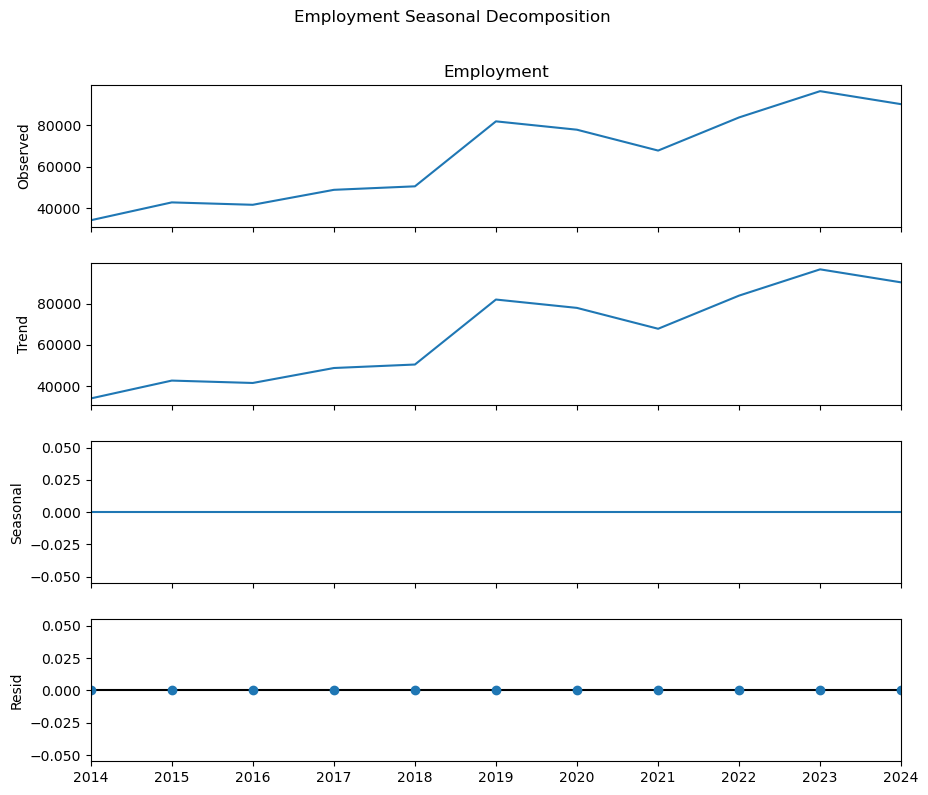

In [ ]:
merged_indexed = merged.set_index(pd.to_datetime(merged["Year"], format="%Y"))
decomp = seasonal_decompose(merged_indexed["Employment"], model="additive", period=1)
fig = decomp.plot(); fig.set_size_inches(10, 8)
fig.axes[0].set_ylabel("Observed")
plt.suptitle("Employment Seasonal Decomposition", y=1.02)
plt.show()

### Interpretation

>The trend component shows steady growth with pandemic‑related volatility. Seasonal and residual components are minimal, reflecting the annual frequency of the data.

## Normalized Comparative Trends of Employment and Predictors

### Description
>This visualization compares normalized employment, job openings, unemployment, and housing prices on a common 0–1 scale. Plotting all variables together highlights co-movement and divergence over time

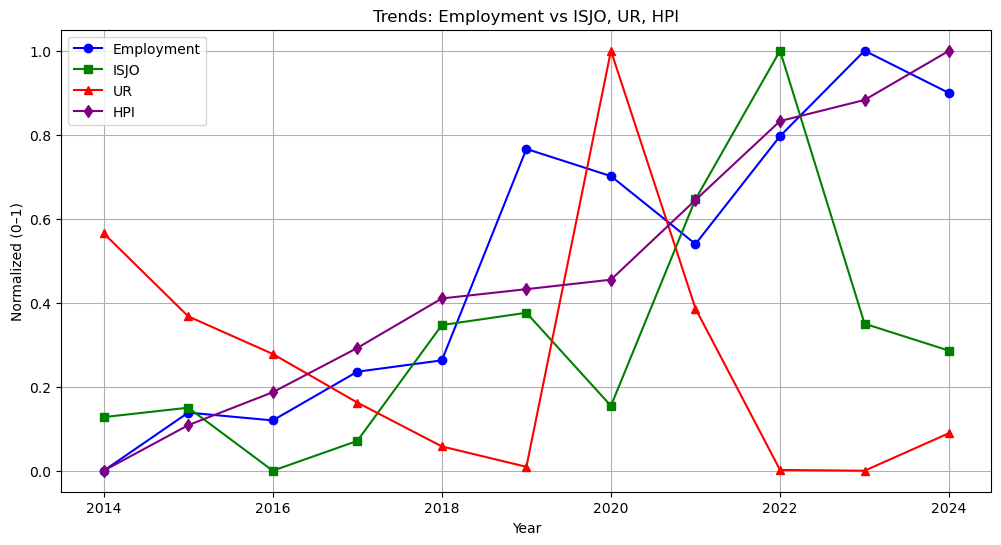

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(merged["Year"], merged["Employment_norm"], label="Employment", marker="o", color="blue")
plt.plot(merged["Year"], merged["ISJO_Avg_norm"], label="ISJO", marker="s", color="green")
plt.plot(merged["Year"], merged["UR_Avg_norm"], label="UR", marker="^", color="red")
plt.plot(merged["Year"], merged["HPI_Avg_norm"], label="HPI", marker="d", color="purple")
plt.xlabel("Year"); plt.ylabel("Normalized (0–1)")
plt.title("Trends: Employment vs ISJO, UR, HPI")
plt.legend(); plt.grid(True); plt.show()

### Interpretation

>Employment, job openings, and housing prices rise in tandem, while unemployment moves inversely. The shared scale clarifies relative changes and strengthens the case for demand and housing costs as key drivers.

## Individual Time‑Series Trends by Variable

### Description
>Each subplot presents a normalized time-series for employment, job openings, unemployment, and housing prices. Displaying variables separately emphasizes distinct dynamics while preserving comparability across units.

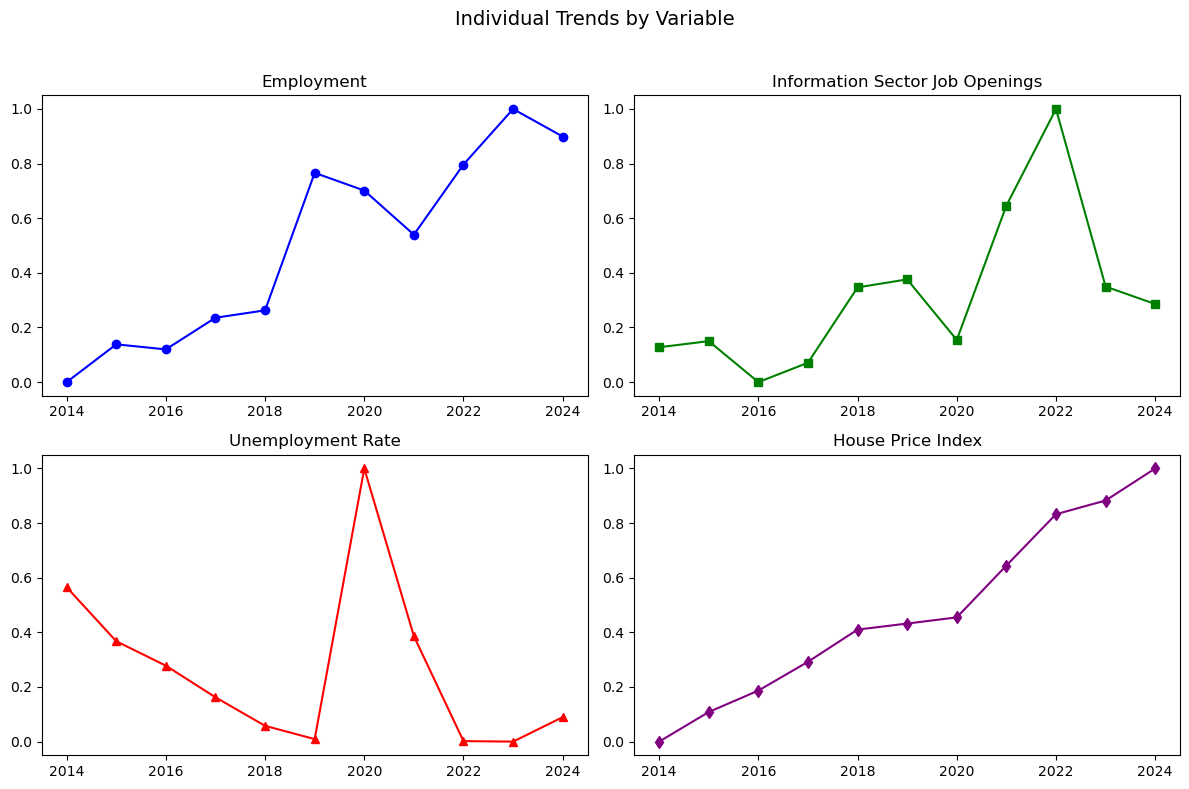

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes[0,0].plot(merged["Year"], merged["Employment_norm"], marker="o", color="blue")
axes[0,0].set_title("Employment")
axes[0,1].plot(merged["Year"], merged["ISJO_Avg_norm"], marker="s", color="green")
axes[0,1].set_title("Information Sector Job Openings")
axes[1,0].plot(merged["Year"], merged["UR_Avg_norm"], marker="^", color="red")
axes[1,0].set_title("Unemployment Rate")
axes[1,1].plot(merged["Year"], merged["HPI_Avg_norm"], marker="d", color="purple")
axes[1,1].set_title("House Price Index")
plt.suptitle("Individual Trends by Variable", fontsize=14)
plt.tight_layout(rect=[0,0,1,0.96]); plt.show()

### Interpretation

>Employment and job openings trend upward with pandemic-era volatility, unemployment drops overall with a sharp 2020 spike, and housing prices steadily climb. The normalized axes make differences in slope and variability clear.

## Employment Relationships with Predictors: Scatterplots and Regression Lines

### Description
>Scatterplots visualize pairwise relationships between employment and each predictor, overlaid with fitted regression lines. Axes reflect either raw or normalized values as noted, linking visual trends to linear associations.

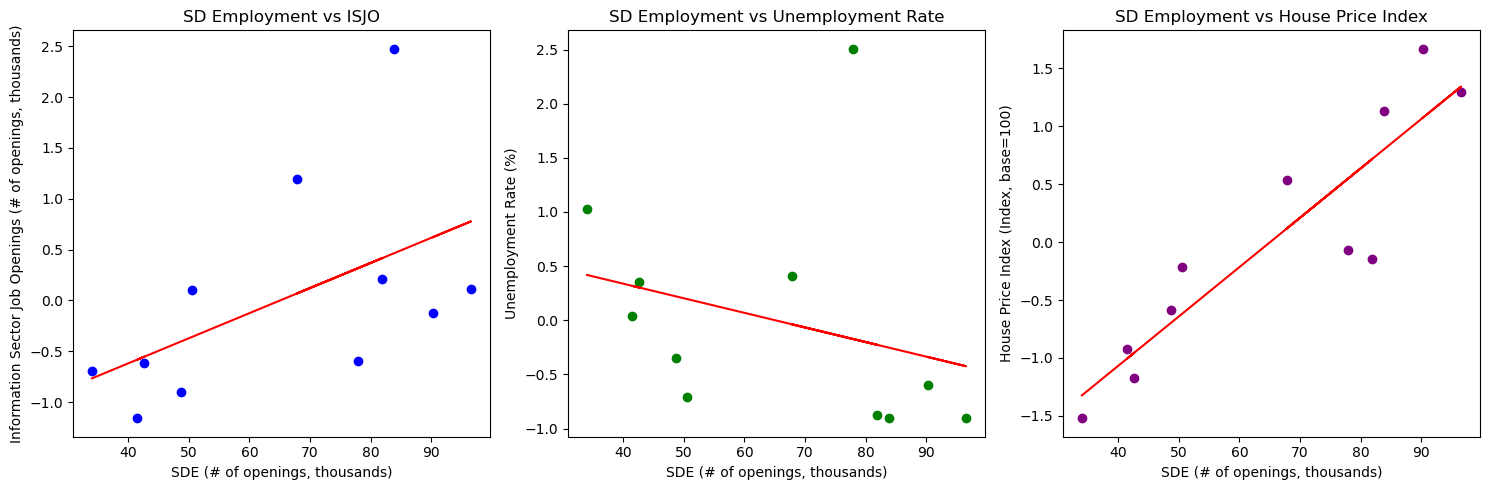

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].scatter(merged["Employment"]/1000, merged["ISJO_Avg"], color="blue")
m, b = np.polyfit(merged["Employment"]/1000, merged["ISJO_Avg"], 1)
axes[0].plot(merged["Employment"]/1000, m*(merged["Employment"]/1000)+b, color="red")
axes[0].set_title("SD Employment vs ISJO")
axes[0].set_xlabel("SDE (# of openings, thousands)")
axes[0].set_ylabel("Information Sector Job Openings (# of openings, thousands)")

axes[1].scatter(merged["Employment"]/1000, merged["UR_Avg"], color="green")
m, b = np.polyfit(merged["Employment"]/1000, merged["UR_Avg"], 1)
axes[1].plot(merged["Employment"]/1000, m*(merged["Employment"]/1000)+b, color="red")
axes[1].set_title("SD Employment vs Unemployment Rate")
axes[1].set_xlabel("SDE (# of openings, thousands)")
axes[1].set_ylabel("Unemployment Rate (%)")

axes[2].scatter(merged["Employment"]/1000, merged["HPI_Avg"], color="purple")
m, b = np.polyfit(merged["Employment"]/1000, merged["HPI_Avg"], 1)
axes[2].plot(merged["Employment"]/1000, m*(merged["Employment"]/1000)+b, color="red")
axes[2].set_title("SD Employment vs House Price Index")
axes[2].set_xlabel("SDE (# of openings, thousands)")
axes[2].set_ylabel("House Price Index (Index, base=100)")

plt.tight_layout()
plt.show()

### Interpretation

>Employment shows strong positive associations with job openings and housing prices, and a negative association with unemployment. The fitted lines capture direction and strength, supporting their use in multivariate modeling.

## Correlation Matrix of Employment and Predictors
### Description
>The correlation matrix summarizes linear relationships among employment, job openings, unemployment, and housing prices. Each cell shows the strength and direction of correlation between two variables. The heatmap visualization uses color intensity to highlight stronger associations. This tool provides a quick diagnostic for multicollinearity and predictor relevance.

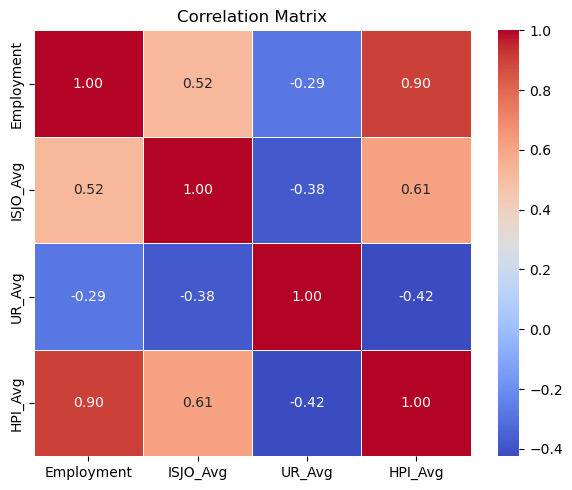

In [ ]:
corr = merged[["Employment","ISJO_Avg","UR_Avg","HPI_Avg"]].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### Interpretation

>Employment correlates positively with job openings and housing prices and negatively with unemployment. The pattern suggests potential multicollinearity among predictors, which is consistent with the regression diagnostics.

## Multiple Linear Regression of Employment on ISJO, HPI, and UR
### Description
>This section fits a multiple linear regression model where employment is explained by job openings (ISJO), housing prices (HPI), and unemployment rate (UR). Predictors are standardized so that coefficients are directly comparable across variables measured in different units. The regression output includes coefficients, standard errors, t‑statistics, p‑values, and overall model fit statistics such as R². Confidence intervals and diagnostic warnings are also reported to assess reliability and potential issues like multicollinearity.

In [ ]:
X = merged[["ISJO_Avg","HPI_Avg","UR_Avg"]]
y = merged["Employment"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Employment   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     11.14
Date:                Wed, 10 Dec 2025   Prob (F-statistic):            0.00468
Time:                        04:53:17   Log-Likelihood:                -115.54
No. Observations:                  11   AIC:                             239.1
Df Residuals:                       7   BIC:                             240.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.506e+04   3334.474     19.512      0.0

/opt/conda/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


### Interpretation

>The regression results show positive coefficients for ISJO and HPI, indicating that higher job demand and housing prices are associated with greater employment. The coefficient for UR is negative, consistent with the expectation that higher unemployment reduces employment levels. The model achieves an R² of about 0.827, demonstrating strong explanatory power above the reliability threshold of 0.60. However, the warning about multicollinearity and limited sample size suggests caution, as overlapping predictor trends may inflate variance and reduce robustness of the estimates.

## Regression‑Based Employment Forecast with Confidence Intervals (2025–2027)
### Description
>This section applies the multiple linear regression model to forecast employment levels for 2025–2027. Predictor trends for job openings, housing prices, and unemployment are extrapolated forward to generate future values. Forecasted employment is then calculated using these predictors, with confidence intervals included to capture uncertainty. The results are presented in both tabular and graphical form to highlight the range of possible outcomes.

In [ ]:
years = merged["Year"].values
isjo_trend = np.polyfit(years, merged["ISJO_Avg"], 1)
hpi_trend = np.polyfit(years, merged["HPI_Avg"], 1)
ur_trend   = np.polyfit(years, merged["UR_Avg"], 1)

future_years = np.array([2025, 2026, 2027])
future_isjo = np.polyval(isjo_trend, future_years)
future_hpi  = np.polyval(hpi_trend, future_years)
future_ur   = np.polyval(ur_trend, future_years)

future_df = pd.DataFrame({
    "Year": future_years,
    "ISJO_Avg": future_isjo,
    "HPI_Avg": future_hpi,
    "UR_Avg": future_ur
})

X_future = sm.add_constant(future_df[["ISJO_Avg","HPI_Avg","UR_Avg"]])
predictions = model.get_prediction(X_future)
pred_summary = predictions.summary_frame(alpha=0.05)

future_df["Predicted_Employment"] = pred_summary["mean"]
future_df["Lower_CI"] = pred_summary["obs_ci_lower"]
future_df["Upper_CI"] = pred_summary["obs_ci_upper"]

print("\nRegression Forecasted Employment 2025–2027 with Confidence Intervals:")
print(future_df[["Year","Predicted_Employment","Lower_CI","Upper_CI"]].to_string(index=False))


Regression Forecasted Employment 2025–2027 with Confidence Intervals:
 Year  Predicted_Employment     Lower_CI      Upper_CI
 2025         101445.221433 70340.169124 132550.273742
 2026         107509.121975 75143.926747 139874.317204
 2027         113573.022517 79812.212335 147333.832699


### Interpretation

>The regression forecast shows steady growth in employment, rising from about 101,000 in 2025 to over 113,000 in 2027. Confidence intervals are wide, spanning roughly ±30,000 positions, which reflects uncertainty from extrapolation beyond observed data. The positive influence of job openings and housing prices, combined with the negative effect of unemployment, drives the upward trend. The warning emphasizes that while explanatory power is strong, forecasts may overstate growth due to multicollinearity and small sample limitations.

## ARIMAX Forecast of Employment with Exogenous Predictors (2025–2027)
### Description
>The ARIMAX model incorporates lagged employment values along with standardized exogenous predictors to forecast future employment. This approach accounts for both autoregressive dynamics and external drivers like job openings, housing prices, and unemployment. Forecasts are generated for 2025–2027, with confidence intervals included to quantify predictive uncertainty. Results are compared to regression forecasts to evaluate consistency and reliability.

In [ ]:
# (Microsoft Copilot was used to program ARIMAX)
exog = merged[["ISJO_Avg","HPI_Avg","UR_Avg"]]
model_arimax = SARIMAX(merged["Employment"], exog=exog, order=(1,0,1))
results_arimax = model_arimax.fit(disp=False)
print(results_arimax.summary())

future_exog = future_df[["ISJO_Avg","HPI_Avg","UR_Avg"]]
forecast = results_arimax.get_forecast(steps=3, exog=future_exog)
forecast_summary = forecast.summary_frame(alpha=0.05)

future_df["ARIMAX_Predicted"] = forecast_summary["mean"].values
future_df["ARIMAX_Lower_CI"] = forecast_summary["mean_ci_lower"].values
future_df["ARIMAX_Upper_CI"] = forecast_summary["mean_ci_upper"].values

print("\nARIMAX Forecasted Employment 2025–2027 with Confidence Intervals:")
print(future_df[["Year","ARIMAX_Predicted","ARIMAX_Lower_CI","ARIMAX_Upper_CI"]].to_string(index=False))

                               SARIMAX Results                                
Dep. Variable:             Employment   No. Observations:                   11
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -120.247
Date:                Wed, 10 Dec 2025   AIC                            252.494
Time:                        04:53:17   BIC                            254.882
Sample:                             0   HQIC                           250.989
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ISJO_Avg    -612.4235   9687.449     -0.063      0.950   -1.96e+04    1.84e+04
HPI_Avg     2.055e+04   1.44e+04      1.425      0.154   -7722.055    4.88e+04
UR_Avg      2445.3239   1.23e+04      0.199      0.8

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


### Interpretation

>The ARIMAX model produces narrower confidence intervals than regression, suggesting greater stability in predictions. Forecasted employment rises steadily through 2027, though at a more conservative pace. Predictor coefficients remain consistent with regression results, reinforcing demand and housing costs as key drivers. The warning notes that limited historical data may understate uncertainty, so forecasts should be viewed as stable but cautious.

## Comparative Forecasts: Regression vs ARIMAX (2025–2027)
### Description
>This section directly compares regression and ARIMAX forecasts against actual employment data. Both models’ predictions are plotted alongside confidence intervals to visualize uncertainty. The comparison highlights differences in magnitude and interval width between the two approaches. This focal analysis demonstrates how explanatory power and predictive reliability diverge in practice.

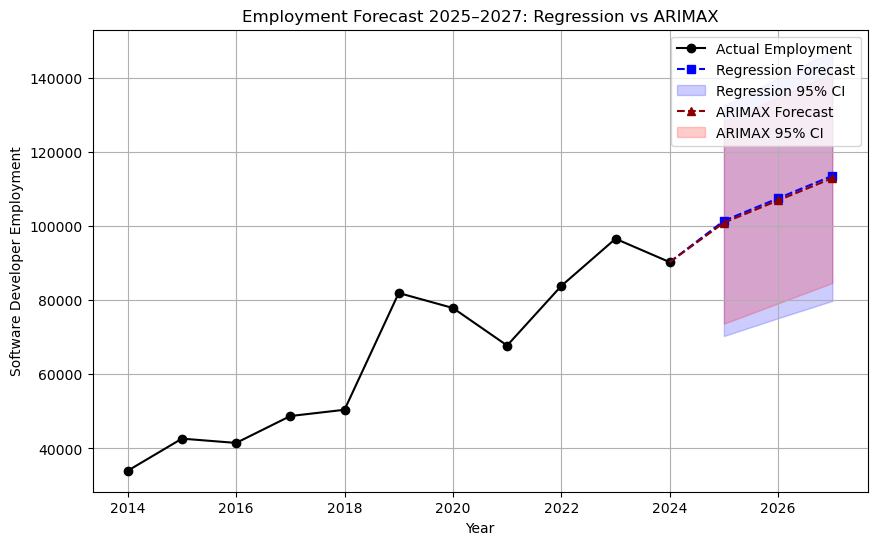

In [ ]:
# (Microsoft CoPilot was used to implement ARIMAX to compare plot regression vs. ARIMAX predictions)
plt.figure(figsize=(10,6))

plt.plot(merged["Year"], merged["Employment"], label="Actual Employment", marker="o", color="black")

plt.plot(future_df["Year"], future_df["Predicted_Employment"], label="Regression Forecast",
         marker="s", linestyle="--", color="blue")
plt.fill_between(future_df["Year"], future_df["Lower_CI"], future_df["Upper_CI"],
                 color="blue", alpha=0.2, label="Regression 95% CI")

plt.plot(future_df["Year"], future_df["ARIMAX_Predicted"], label="ARIMAX Forecast",
         marker="^", linestyle="--", color="darkred")
plt.fill_between(future_df["Year"], future_df["ARIMAX_Lower_CI"], future_df["ARIMAX_Upper_CI"],
                 color="red", alpha=0.2, label="ARIMAX 95% CI")

plt.plot([merged["Year"].iloc[-1], future_df["Year"].iloc[0]],
         [merged["Employment"].iloc[-1], future_df["Predicted_Employment"].iloc[0]],
         linestyle="--", color="blue")
plt.plot([merged["Year"].iloc[-1], future_df["Year"].iloc[0]],
         [merged["Employment"].iloc[-1], future_df["ARIMAX_Predicted"].iloc[0]],
         linestyle="--", color="darkred")

plt.xlabel("Year")
plt.ylabel("Software Developer Employment")
plt.title("Employment Forecast 2025–2027: Regression vs ARIMAX")
plt.legend()
plt.grid(True)
plt.show()

### Interpretation
>Both models predict continued growth in employment through 2027. Regression forecasts are higher, reflecting stronger sensitivity to predictor trends, while ARIMAX is more conservative. Confidence intervals differ: regression intervals are wider, capturing more uncertainty, whereas ARIMAX intervals are narrower, implying stability. The overlap between intervals shows agreement on growth direction despite magnitude differences. This comparison underscores the project’s focal point: regression highlights explanatory power, while ARIMAX emphasizes predictive reliability under uncertainty.

## Exploratory Data Analysis: Description and Analysis

At first, we looked over the data and found that both employment and housing prices were very skewed to the right, while job openings and unemployment had wider but different ranges. Since these variables were on very different scales (employment in tens of thousands, job openings in thousands, unemployment in percentages, and housing prices in index values), a direct comparison would have been deceptive. 

In order to solve these problems, we decided to use log transformations for employment and housing prices in order to make their distributions closer to normal, standardized predictors with StandardScaler for regression and ARIMAX modeling, and normalized all numeric variables to a 0–1 scale for visualization. These steps made the statistical models reliable and easy to understand, and the plots also became directly comparable and less affected by differences in units or distributional shape. 

## Ethics

This project was carefully planned with a focus on methodological transparency and ethical considerations. Since the models employed were statistical (multiple regression and ARIMAX), there was no need for hyper-parameter tuning and machine learning diagnostics such as learning curves or parameter sweeps. What we did instead was to carry out diagnostic checks that were suitable for the methods used, for example, the tests for multicollinearity, residual analysis, and confidence interval estimation, in order to make sure that the results are interpretable and robust. These diagnostic checks serve the same role as hyper‑parameter selection, learning curves, or parameter sweeps in machine learning models, ensuring that our methods were appropriately validated within their statistical framework.

Besides that, we recognize that limitations surround the forecasts' reliability. The dataset is limited, having only 11 annual observations, which lowers the statistical power and increases the sensitivity to outliers. Predictor overlap, especially between job demand and housing prices, raises multicollinearity that can increase the coefficient variance. In addition, the models imply that past relationships will be kept in the future, which is a prediction that may not be true if there are disruptive changes like AI adoption, macroeconomic shocks, or policy interventions.

By explicitly presenting these limitations, the study turns down the risk of overstating its conclusions and conveying that results should be considered as exploratory. Transparent ethical modeling involves being open about uncertainty, and this project demonstrates both the promise of local multivariate forecasting and the requirement for bigger datasets and scenario-based approaches in subsequent research. 

## Discusison and Conclusion

Our analysis suggests that job demand and housing costs have a significant influence on software developer employment in Santa Clara County, while unemployment serves as a key control variable. Both regression and ARIMAX models forecast continued expansion through 2027, and the agreement of findings across methods provides confidence in the overall direction of the trend. However, the magnitude of forecasts differs, with regression producing higher estimates and ARIMAX offering more conservative ones. This divergence underscores the necessity of considering multiple modeling approaches when evaluating employment forecasts.

Several limitations constrain the interpretability of these results. The dataset is relatively small, containing only 11 annual observations, which restricts statistical power and increases sensitivity to outliers. Multicollinearity among predictors—particularly between job demand and housing prices—may inflate variance and reduce the reliability of coefficient estimates. Moreover, the models assume that past relationships will remain stable into the future, an assumption that may not hold under disruptive changes such as AI adoption, macroeconomic shocks, or policy interventions. These factors limit the precision of the forecasts and caution against drawing definitive conclusions.

Taken together, the findings suggest that while demand and housing costs are useful indicators of employment trends, the results should be interpreted as exploratory rather than conclusive. The models provide evidence that software developer employment is likely to continue increasing, but the wide confidence intervals and methodological constraints highlight the need for larger datasets and scenario‑based modeling in future research. By framing the results within these limitations, the study contributes to understanding localized labor market dynamics while acknowledging that predictive reliability remains conditional and subject to refinement.